<a href="https://colab.research.google.com/github/Animichael/Advanced-Breast-Cancer-Model/blob/main/Breast_Cancer_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING THE REQUIRED PYTHON LIBRARIES FOR THIS PROJECT:**

# New Section

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest, chi2

**DATA UPLOADING**

In [ ]:
# using pandas to load the dataset into a dataframe
df= pd.read_csv('/content/breast-cancer1.csv')

In [ ]:
# viewing the dataset
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# getthe list of all the variable in the dataset
for col in  df.columns:
  print(col)

id
diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst


In [ ]:
# checking for deplicate entries
df.duplicated().sum()

np.int64(0)

In [ ]:
# checking for missing values
df.isna().sum().sum()

np.int64(0)

In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


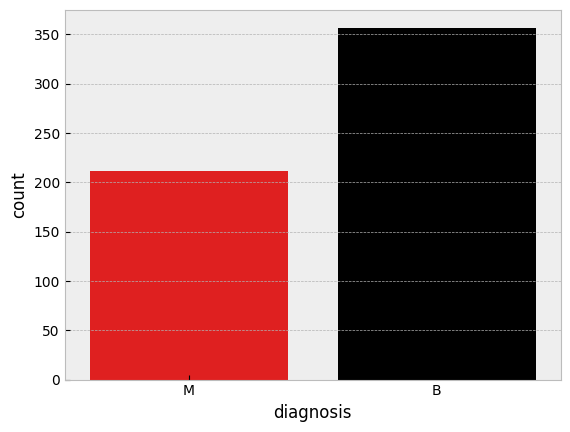

In [ ]:
plt.style.use('bmh')
sns.countplot(x='diagnosis', data=df, palette=['red', 'black'])
plt.show()

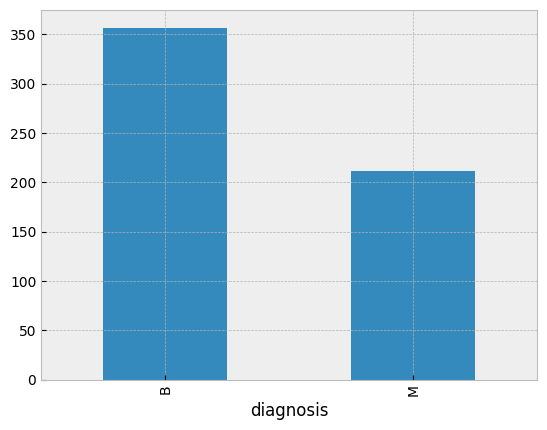

In [ ]:
# using a barchart
df.diagnosis.value_counts().plot(kind='bar')
plt.show()

In [ ]:
df['result']=df['diagnosis']

In [ ]:
df.drop('diagnosis', axis=1, inplace=True)

In [ ]:
df.rename(columns={'result': 'diagnosis'}, inplace=True)
df

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [ ]:
# encoding the target variable
map = {'M': 1, 'B': 0}
df['diagnosis'] = df['diagnosis'].map(map)
df

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [ ]:
# using the chi-saure technique for feature selection
X = df.drop(['id', 'diagnosis'], axis=1)  # Features
y = df['diagnosis']      # Features



In [ ]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [ ]:
scaler =StandardScaler()

x_scale = scaler.fit_transform(X)

In [ ]:
x_scale

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
scaler_2 = MinMaxScaler()
x_scale_2 = scaler_2.fit_transform(X)
x_scale_2

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [ ]:
# selector = SelectKBest(score_func=chi2, k=10)
# X_new = selector.fit_transform(x_scale , y)

In [ ]:
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(x_scale_2 , y)

In [ ]:
X_new

array([[0.52103744, 0.54598853, 0.36373277, ..., 0.45069799, 0.56861022,
        0.91202749],
       [0.64314449, 0.61578329, 0.50159067, ..., 0.43521431, 0.19297125,
        0.63917526],
       [0.60149557, 0.59574321, 0.44941676, ..., 0.37450845, 0.35974441,
        0.83505155],
       ...,
       [0.45525108, 0.44578813, 0.30311771, ..., 0.23073142, 0.27180511,
        0.48728522],
       [0.64456434, 0.66553797, 0.4757158 , ..., 0.402035  , 0.74976038,
        0.91065292],
       [0.03686876, 0.02853984, 0.01590668, ..., 0.02049744, 0.        ,
        0.        ]])

In [ ]:
# Get the selected feature names
selected_features = X.columns[selector.get_support()]
for feature in selected_features:
    print(feature)


radius_mean
perimeter_mean
area_mean
concavity_mean
concave points_mean
radius_worst
perimeter_worst
area_worst
concavity_worst
concave points_worst


In [ ]:
selected_features=df[['radius_mean', 'perimeter_mean', 'area_mean',
       'radius_worst', 'perimeter_worst', 'concavity_mean',
       'concave points_mean', 'concavity_worst', 'concave points_worst', 'area_worst']]

In [ ]:
selected_features

,radius_mean,perimeter_mean,area_mean,radius_worst,perimeter_worst,concavity_mean,concave points_mean,concavity_worst,concave points_worst,area_worst
0,17.99,122.80,1001.0,25.380,184.60,0.30010,0.14710,0.7119,0.2654,2019.0
1,20.57,132.90,1326.0,24.990,158.80,0.08690,0.07017,0.2416,0.1860,1956.0
2,19.69,130.00,1203.0,23.570,152.50,0.19740,0.12790,0.4504,0.2430,1709.0
3,11.42,77.58,386.1,14.910,98.87,0.24140,0.10520,0.6869,0.2575,567.7
4,20.29,135.10,1297.0,22.540,152.20,0.19800,0.10430,0.4000,0.1625,1575.0
...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,25.450,166.10,0.24390,0.13890,0.4107,0.2216,2027.0
565,20.13,131.20,1261.0,23.690,155.00,0.14400,0.09791,0.3215,0.1628,1731.0
566,16.60,108.30,858.1,18.980,126.70,0.09251,0.05302,0.3403,0.1418,1124.0
567,20.60,140.10,1265.0,25.740,184.60,0.35140,0.15200,0.9387,0.2650,1821.0


In [ ]:
selected_x_scaled = scaler.fit_transform(selected_features)

In [ ]:
selected_x_scaled

array([[ 1.09706398,  1.26993369,  0.9843749 , ...,  2.10952635,
         2.29607613,  2.00123749],
       [ 1.82982061,  1.68595471,  1.90870825, ..., -0.14674897,
         1.0870843 ,  1.89048899],
       [ 1.57988811,  1.56650313,  1.55888363, ...,  0.85497394,
         1.95500035,  1.45628455],
       ...,
       [ 0.70228425,  0.67267578,  0.57795264, ...,  0.3267666 ,
         0.41406869,  0.42790561],
       [ 1.83834103,  1.98252415,  1.73521799, ...,  3.19760468,
         2.28998549,  1.65317077],
       [-1.80840125, -1.81438851, -1.34778924, ..., -1.30583065,
        -1.74506282, -1.07581292]])

**DATA SPLITTING PHASE**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(selected_x_scaled, y, train_size=0.8, test_size=0.2, random_state=42)

In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(ytest.shape)
print(xtest.shape)

(455, 10)
(455,)
(114,)
(114, 10)


**MODEL TRAINING PHASE**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model= LogisticRegression()

In [ ]:
lr_model.fit(xtrain, ytrain)

LogisticRegression()

In [ ]:
y_predict =lr_model.predict(xtrain)
y_predict

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
ytrain_acc = accuracy_score(ytrain, y_predict)
ytrain_acc

0.9604395604395605

In [ ]:
# evaluating the model using the test data
y_predict_test = lr_model.predict(xtest)
y_predict_test

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1])

In [ ]:
y_test=accuracy_score(ytest, y_predict_test)
y_test

0.9736842105263158

**TRAINING MORE ALGORITHMS TO SEE THEIR PERFORMANCE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier

In [ ]:
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Stochastic Gradient Descent": SGDClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [ ]:
training_accuracies = {}

# Train and evaluate
print("Model Evaluation Results:\n")
for name, model in classifiers.items():
    model.fit(xtrain, ytrain)

    # Predictions
    train_pred = model.predict(xtrain)
    test_pred = model.predict(xtest)

    # Accuracy
    train_acc = accuracy_score(ytrain, train_pred)
    test_acc = accuracy_score(ytest, test_pred)

    # Store training accuracy
    training_accuracies[name] = train_acc

    # Print results
    print(f"{name}:")
    print(f"  Training Accuracy: {train_acc:.4f}")
    print(f"  Testing Accuracy:  {test_acc:.4f}\n")

Model Evaluation Results:

Decision Tree:
  Training Accuracy: 1.0000
  Testing Accuracy:  0.9298

Random Forest:
  Training Accuracy: 1.0000
  Testing Accuracy:  0.9561

Gradient Boosting:
  Training Accuracy: 1.0000
  Testing Accuracy:  0.9561

AdaBoost:
  Training Accuracy: 0.9824
  Testing Accuracy:  0.9474

Bagging:
  Training Accuracy: 0.9912
  Testing Accuracy:  0.9474

Support Vector Machine:
  Training Accuracy: 0.9560
  Testing Accuracy:  0.9649

Naive Bayes:
  Training Accuracy: 0.9385
  Testing Accuracy:  0.9737

K-Nearest Neighbors:
  Training Accuracy: 0.9560
  Testing Accuracy:  0.9737

Stochastic Gradient Descent:
  Training Accuracy: 0.9538
  Testing Accuracy:  0.9825

XGBoost:
  Training Accuracy: 1.0000
  Testing Accuracy:  0.9474



**SAVING THE MODEL AS A PICKLE FILE**

In [ ]:
# importig the  pickle file
import pickle


In [ ]:
# saving the lr_model as pickle
pickle.dump(lr_model, open('lr_model.sav', 'wb')) # Wb means write binary

**BUIDLING A PREDICT SYSTEM**

### Load the saved model

In [ ]:
# Load the saved logistic regression model
loaded_model = pickle.load(open('lr_model.sav', 'rb'))

In [ ]:
import ipywidgets as widgets
from IPython.display import display
# Create an output widget to display the prediction
output_widget = widgets.Output()

def predict_cancer(b):
    with output_widget:
        output_widget.clear_output()
        # Get the input values from the widgets
        input_values = [input_widgets[feature].value for feature in selected_features_list]

        # Create a pandas DataFrame with the input values
        input_df = pd.DataFrame([input_values], columns=selected_features_list)
        scaled_input = scaler.transform(input_df)

        # Make a prediction
        prediction = loaded_model.predict(scaled_input)

        # Display the prediction result
        if prediction[0] == 1:
            print("Prediction: Malignant (Cancerous)")
        else:
            print("Prediction: Benign (Non-cancerous)")

# Create a button to trigger the prediction
predict_button = widgets.Button(description="Predict")
predict_button.on_click(predict_cancer)

# Display the button and the output widget
display(predict_button)
display(output_widget)

Button(description='Predict', style=ButtonStyle())

Output()